In [1]:
# all the imports
import random
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [2]:
# your convex polygon points
points = [(372.44,495.63),(370.30,507.15),(362.63,519.94),(354.95,528.47),(348.98,539.13),(335.34,545.10),(318.70,555.33),(300.37,555.76),(284.16,555.76),(270.52,553.20),(246.21,551.92),(235.55,551.92),(213.80,551.07),(196.32,552.35),(180.11,554.91),(160.92,557.47),(138.75,556.61),(118.71,557.04),(104.63,553.20),(83.74,549.36),(76.06,544.67),(63.70,539.56),(54.74,531.45),(49.20,517.81),(46.21,497.77),(47.07,483.69),(51.33,470.90),(61.14,451.28),(71.80,441.48),(92.27,430.39),(102.93,425.27),(114.87,419.73),(132.78,411.20),(150.26,405.23),(171.16,400.54),(185.66,397.13),(209.54,395.42),(227.87,397.13),(248.77,396.70),(282.03,397.98),(298.66,401.82),(307.19,408.21),(318.70,417.60),(323.82,422.29),(343.86,436.78),(354.53,446.59),(360.07,451.71),(366.04,461.09),(371.58,475.16),(373.29,487.10),(372.86,495.21)]
len(points)

51

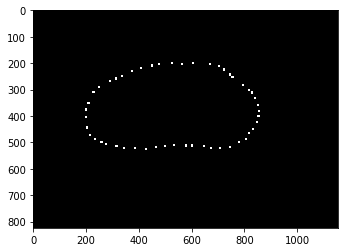

In [3]:
# visualization
margin = 100
# center the points to the corner with some margin
pt0 = np.min(np.array(points), axis=0)
points_centered = points - pt0 + margin
# get the width and height
[w, h] = np.max(np.array(points_centered), axis=0) + margin
scale = 2
# initialize a the image acording to the scale, margin and dimensions
img = np.zeros((scale*int(h)+margin, scale*int(w)+margin))
# drawing the points with small squares
for (width, height) in points_centered:
    x = int(scale*height)
    y = int(scale*width)
    img[x-2*scale:x+2*scale, y-2*scale:y+2*scale] = 1    
plt.imshow(img, cmap='gray')

In [4]:
# %%timeit
# #timing the point inside polygon checking
# point = Point(0.5, 0.5)
# polygon = Polygon(points)
# polygon.contains(point)

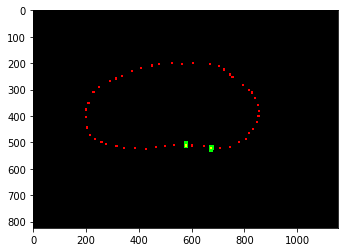

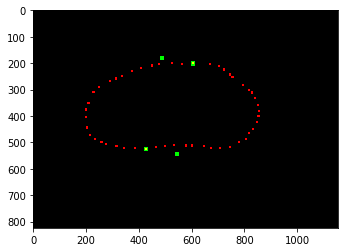

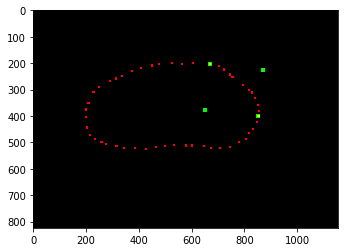

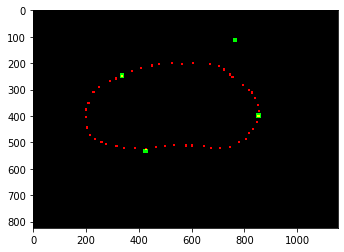

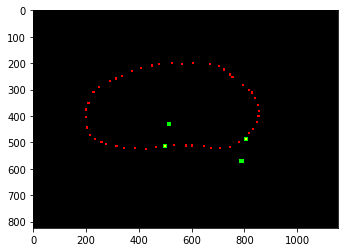

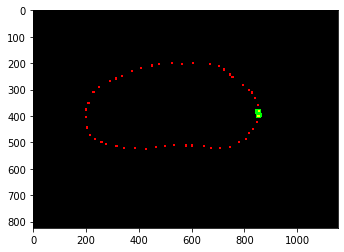

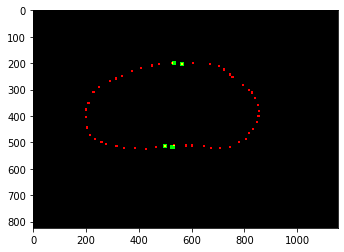

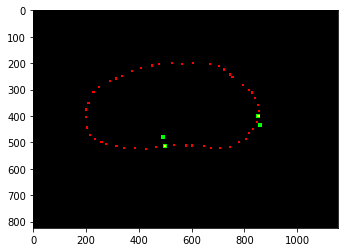

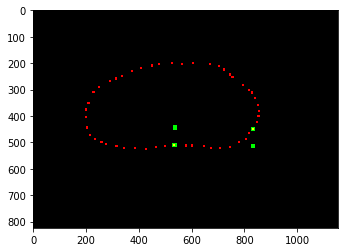

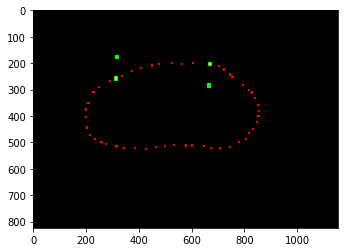

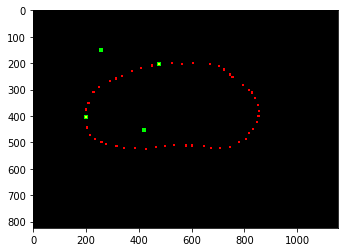

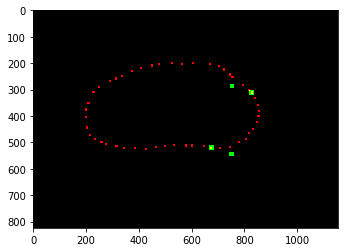

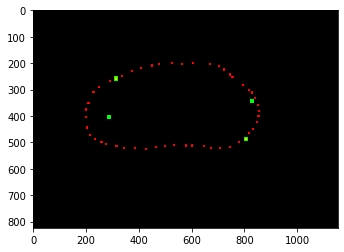

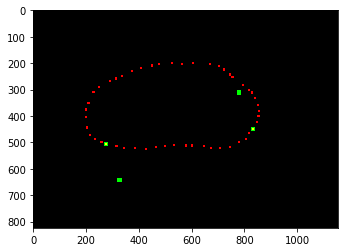

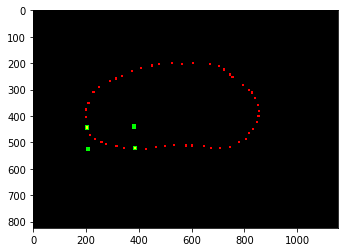

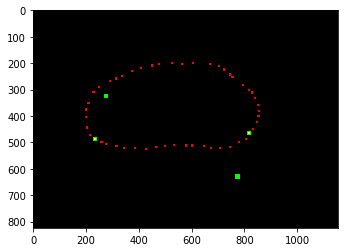

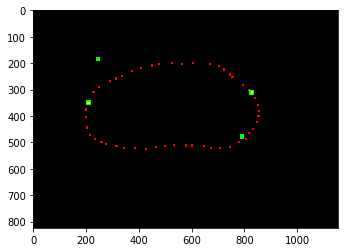

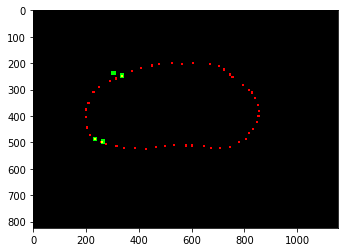

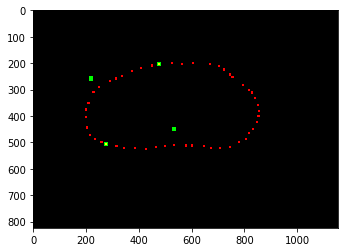

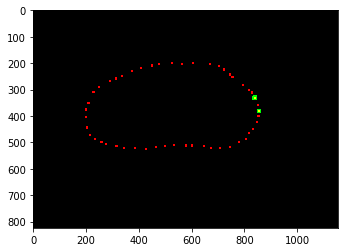

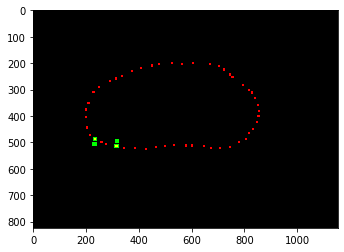

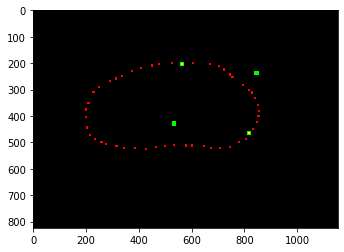

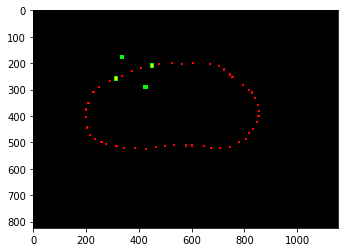

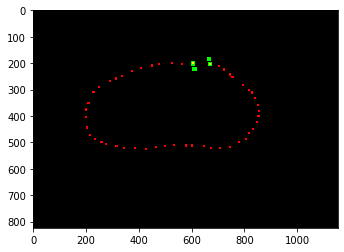

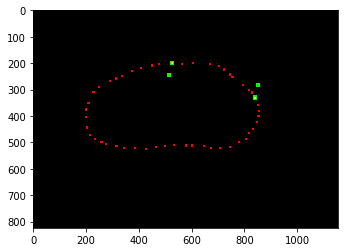

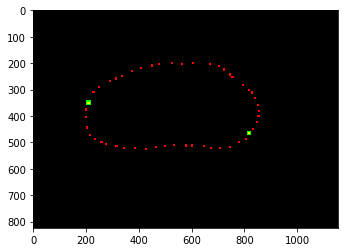

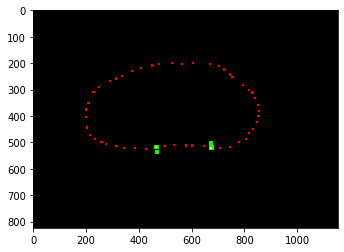

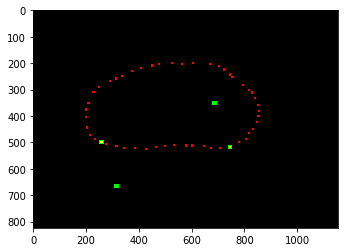

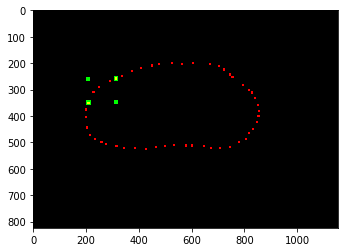

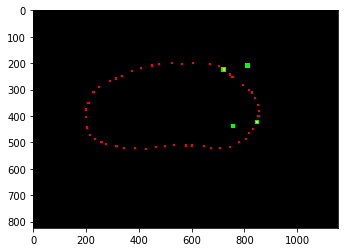

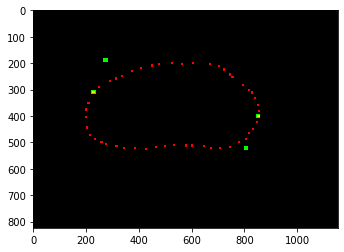

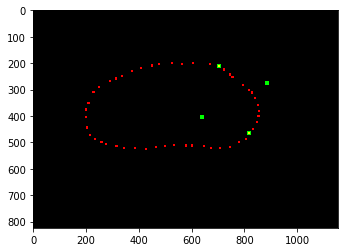

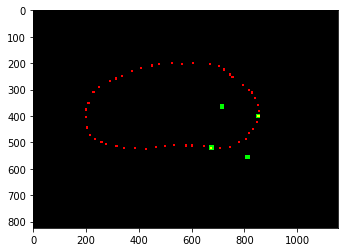

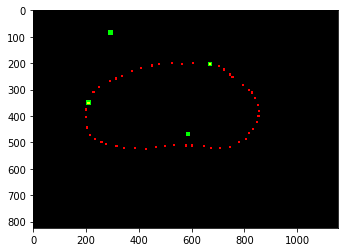

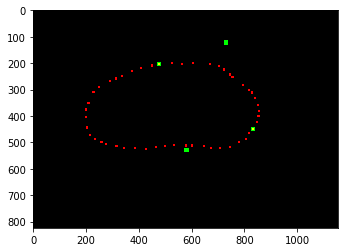

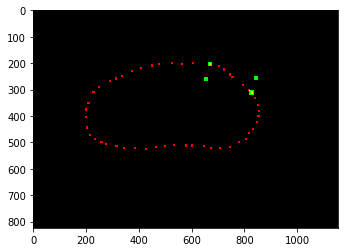

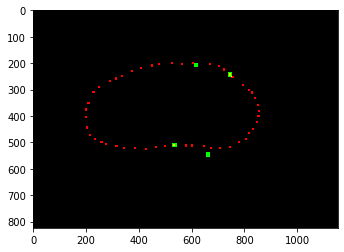

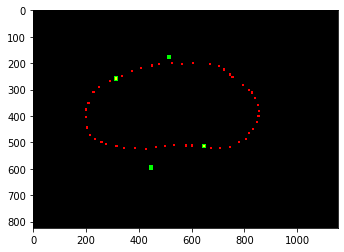

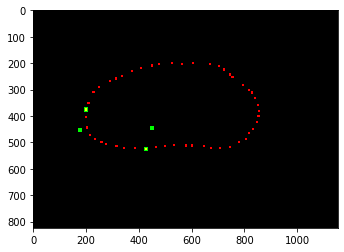

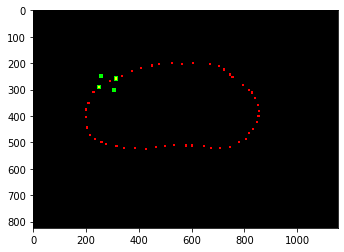

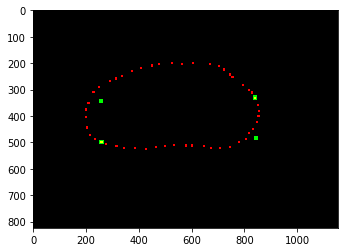

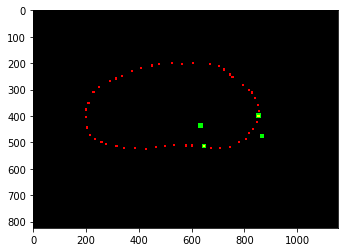

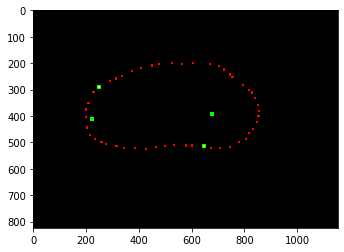

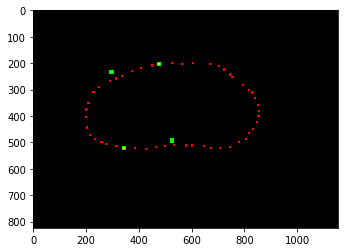

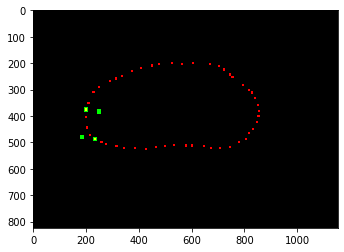

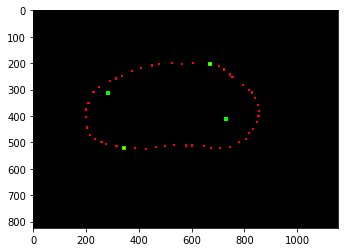

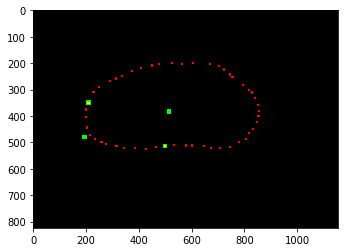

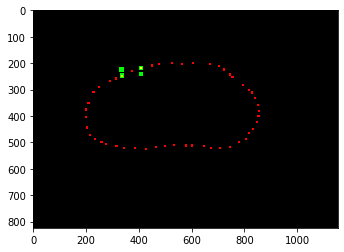

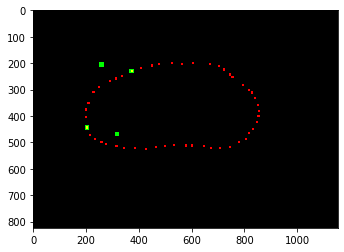

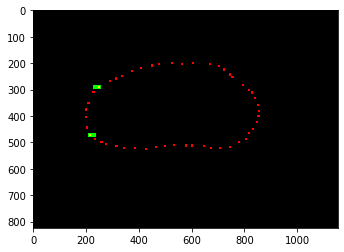

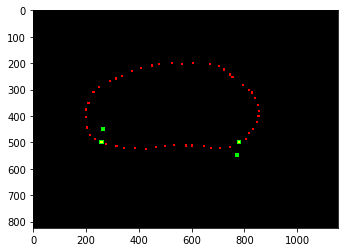

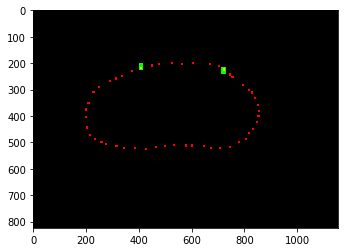

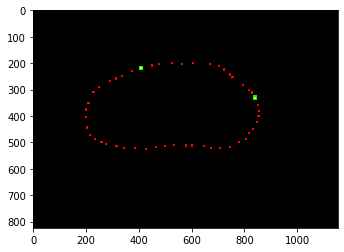

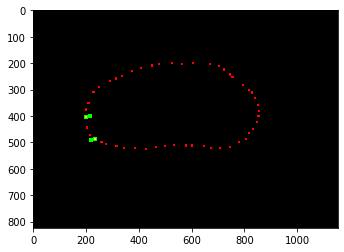

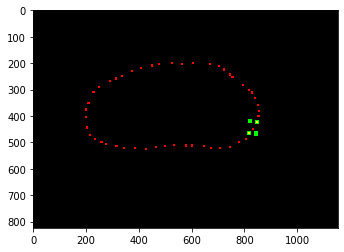

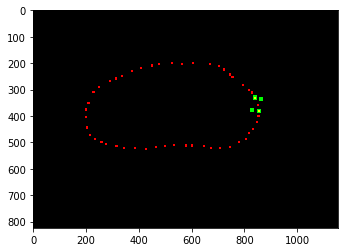

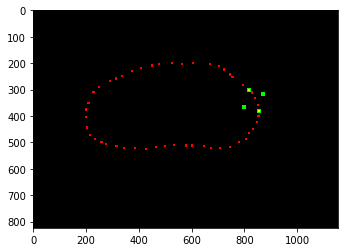

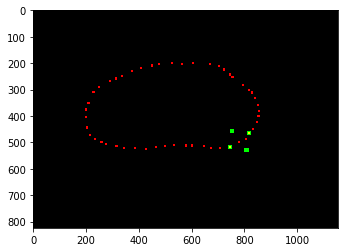

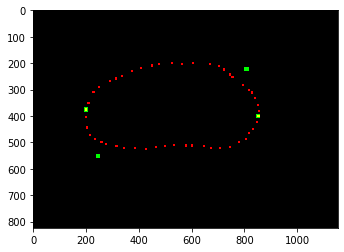

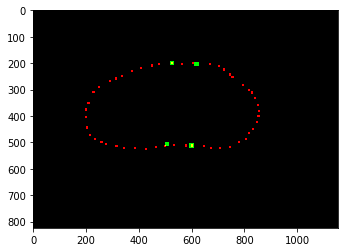

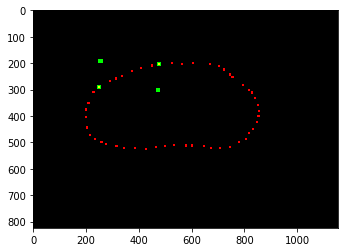

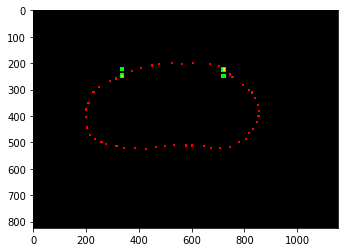

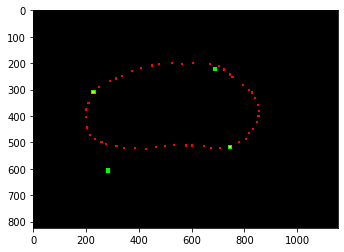

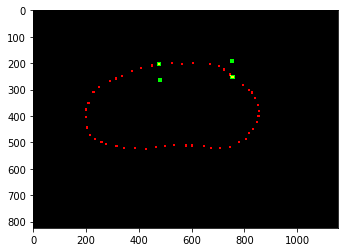

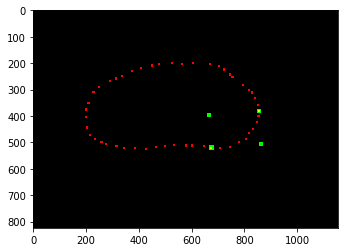

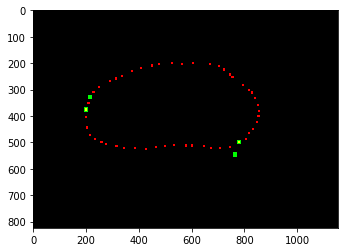

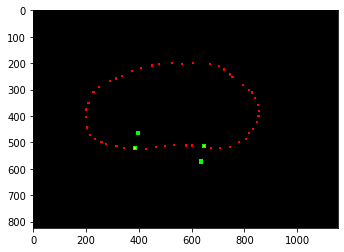

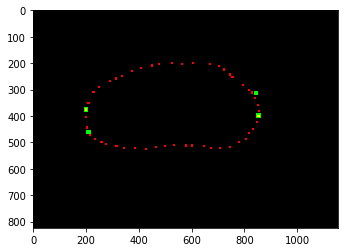

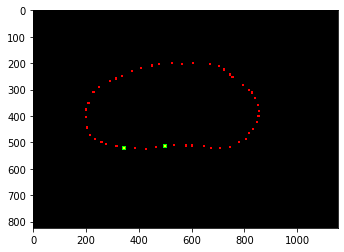

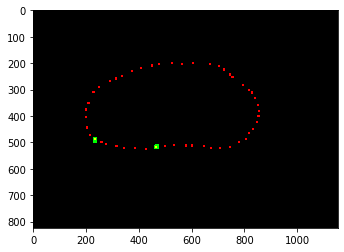

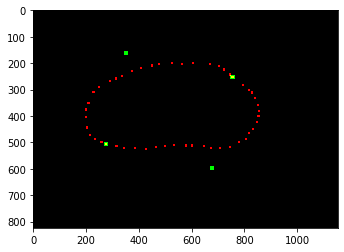

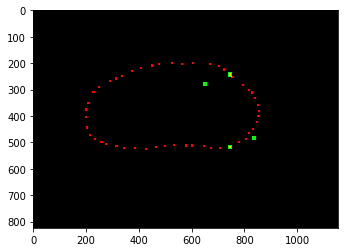

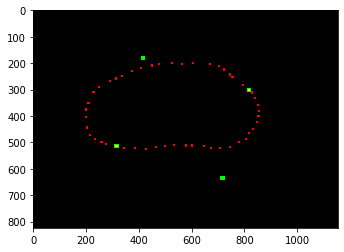

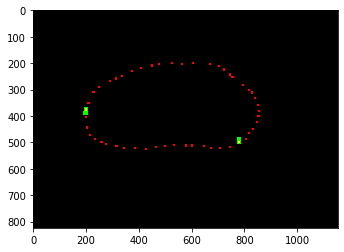

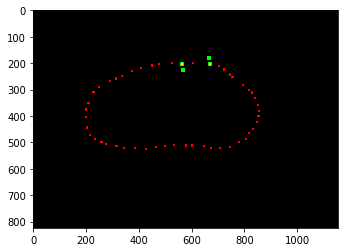

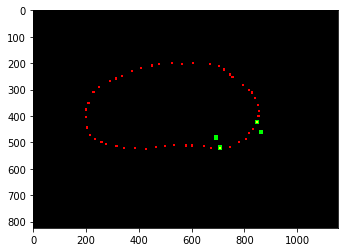

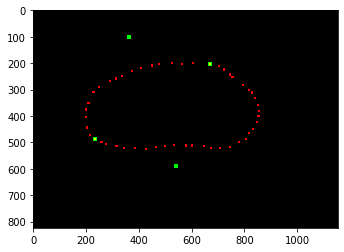

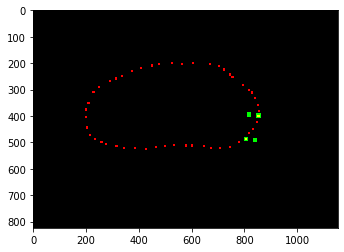

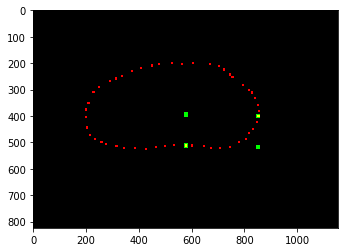

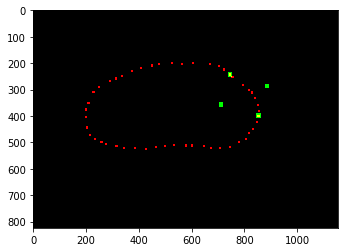

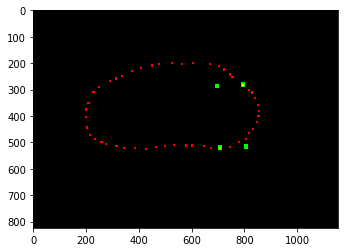

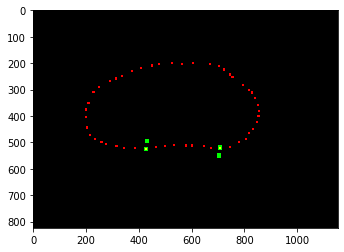

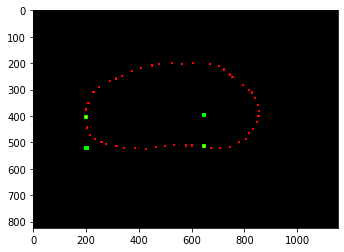

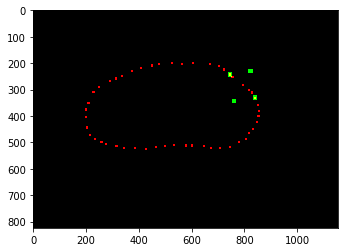

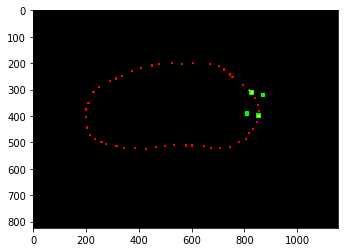

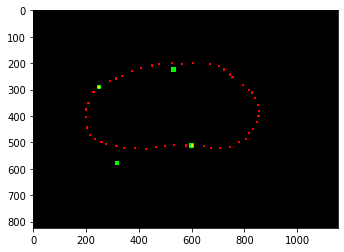

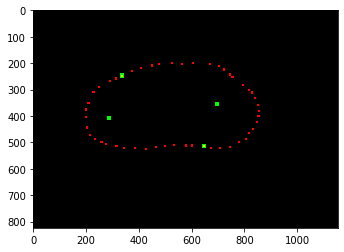

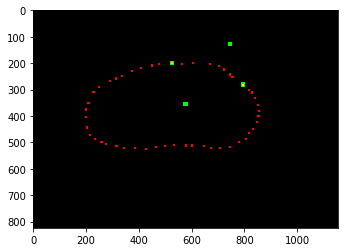

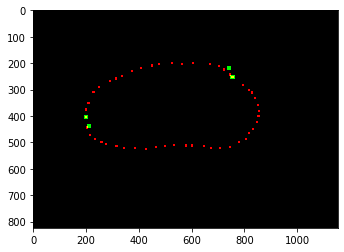

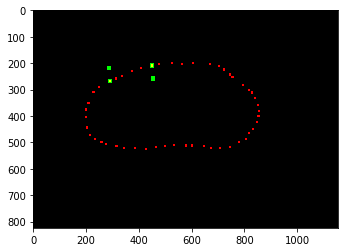

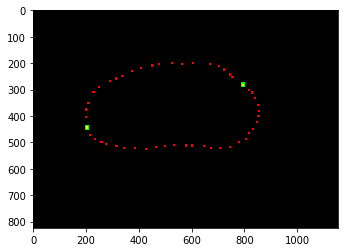

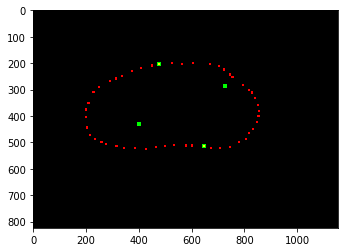

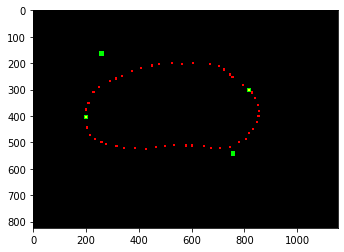

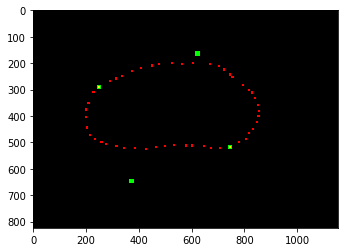

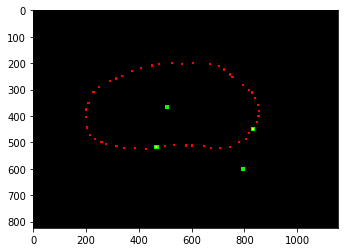

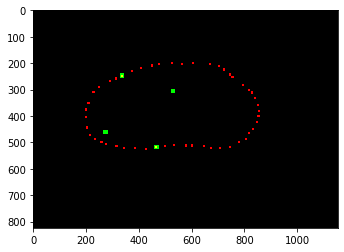

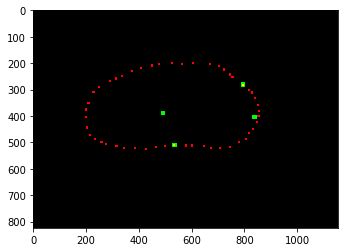

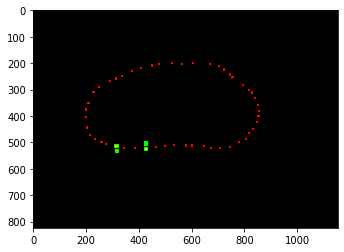

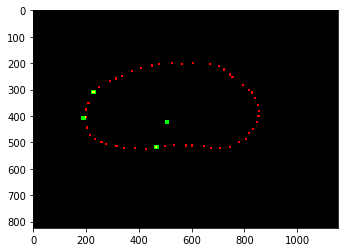

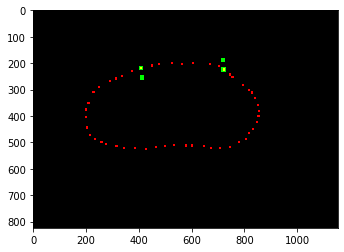

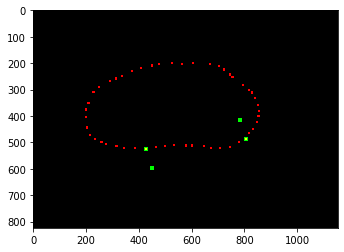

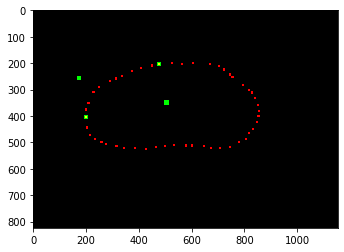

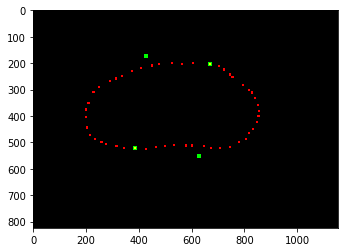

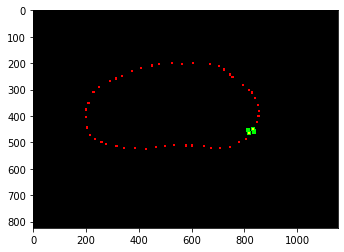

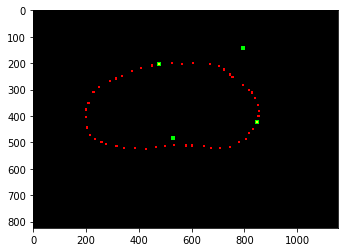

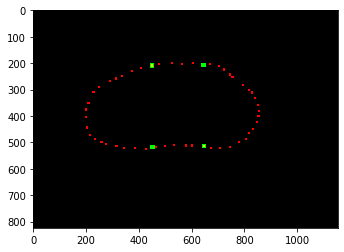

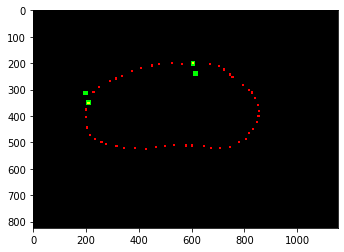

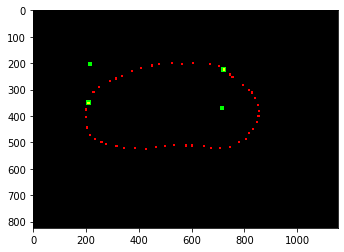

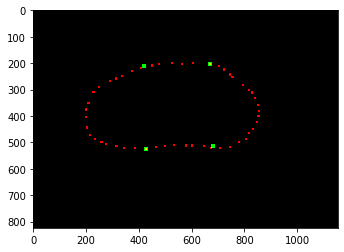

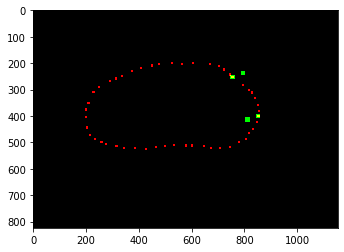

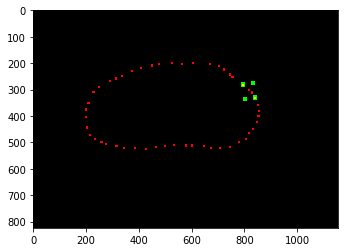

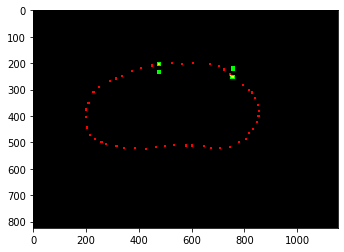

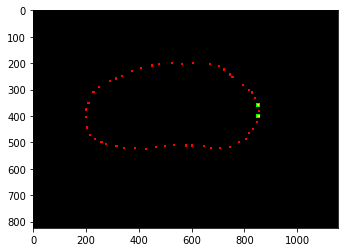

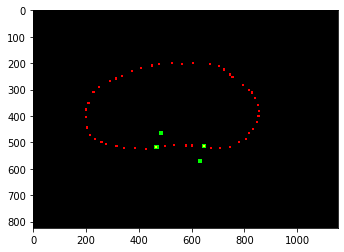

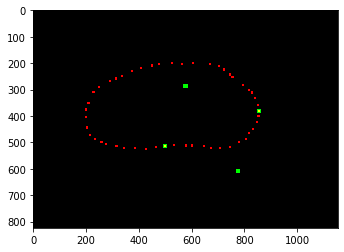

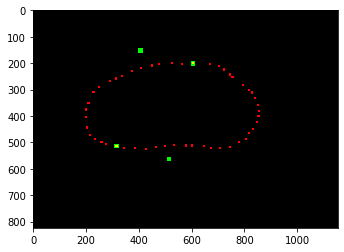

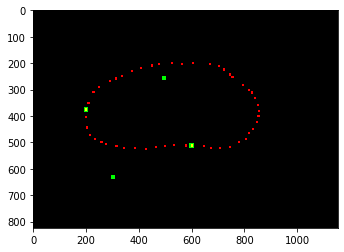

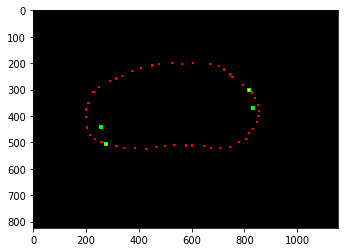

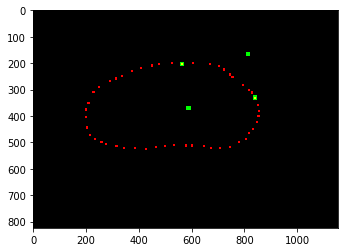

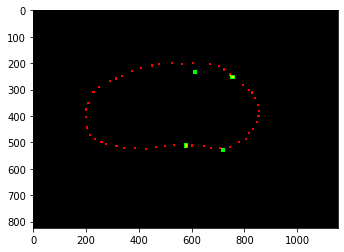

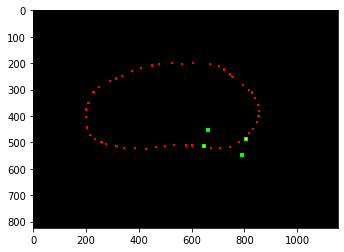

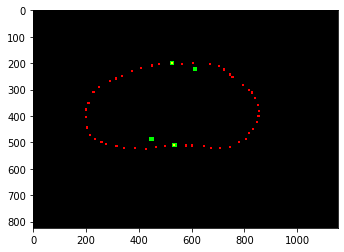

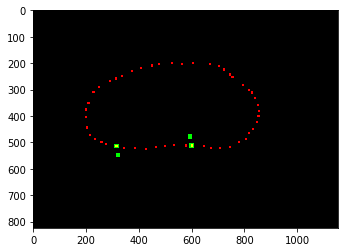

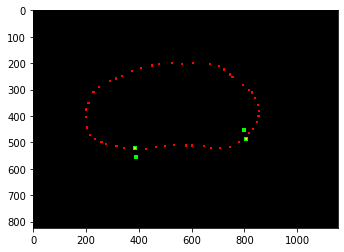

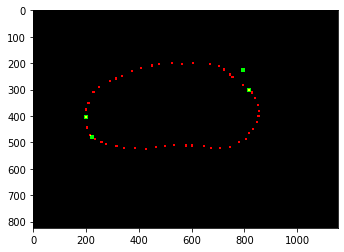

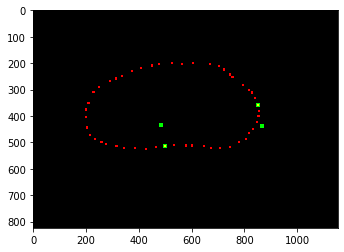

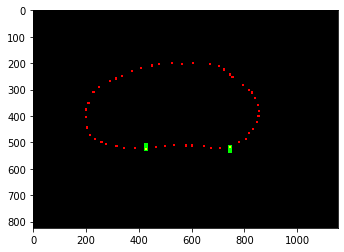

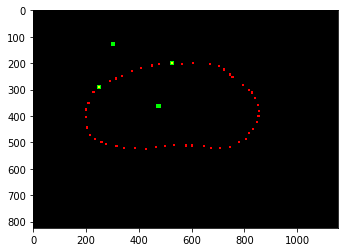

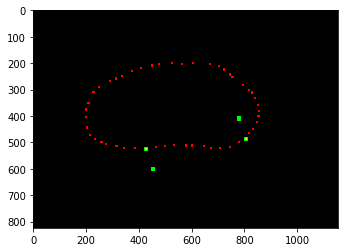

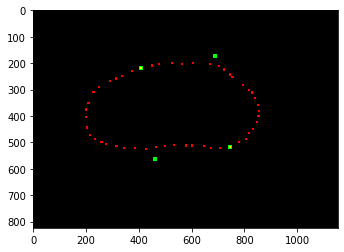

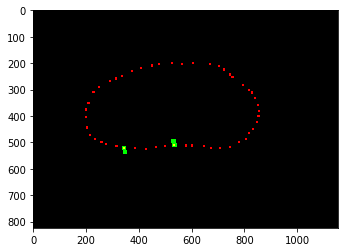

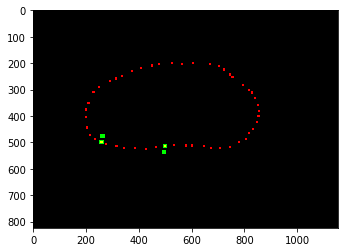

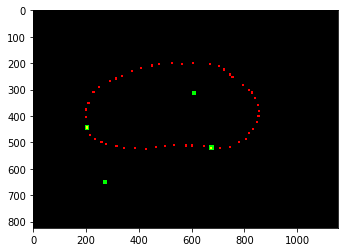

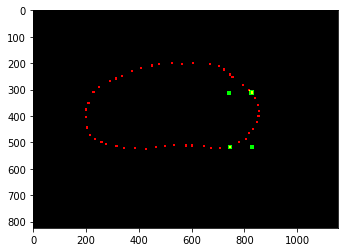

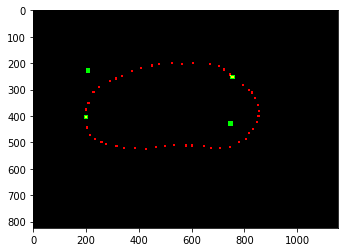

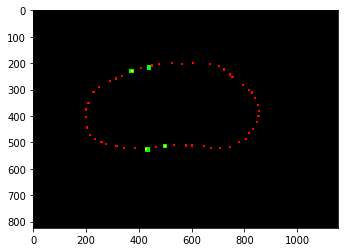

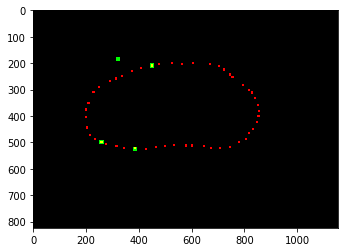

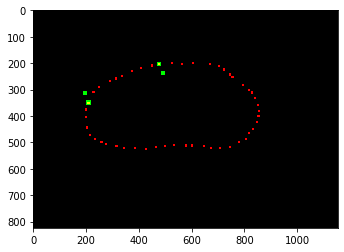

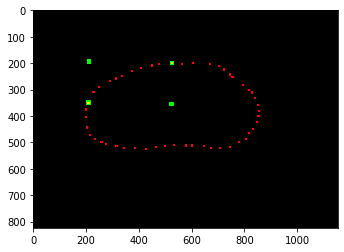

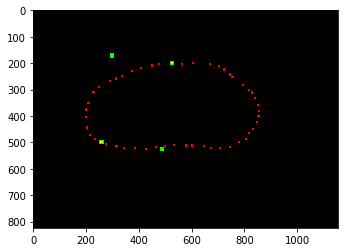

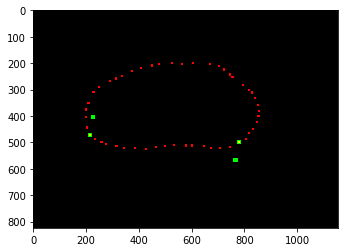

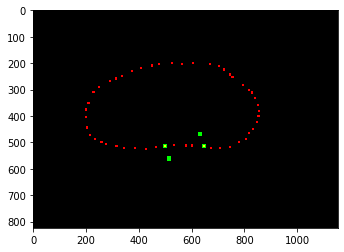

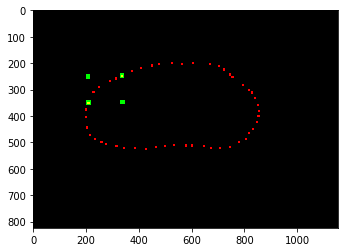

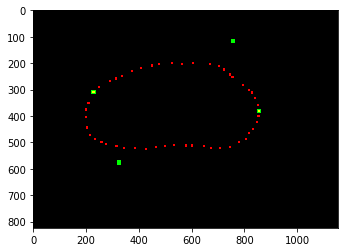

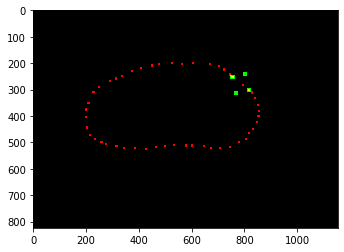

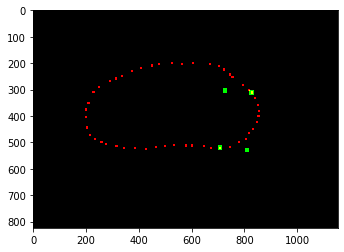

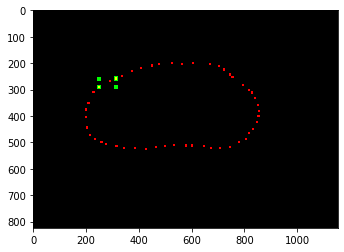

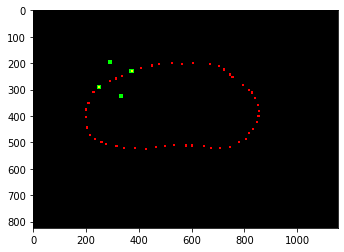

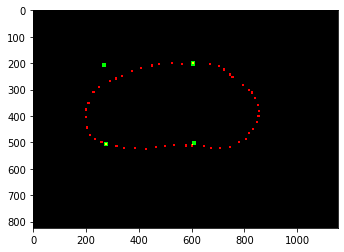

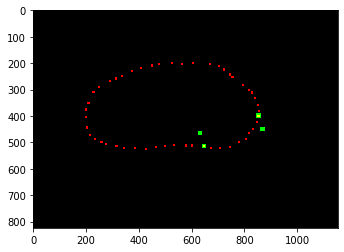

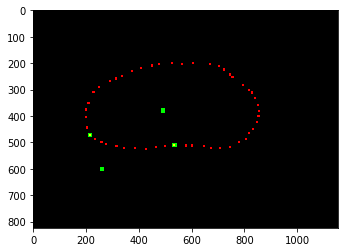

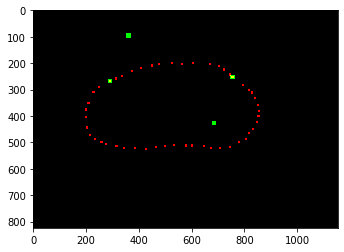

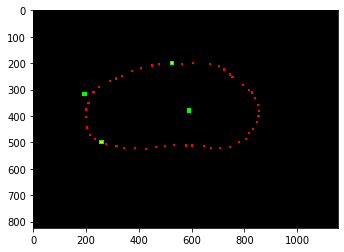

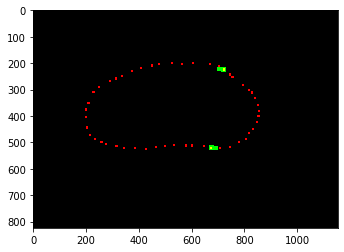

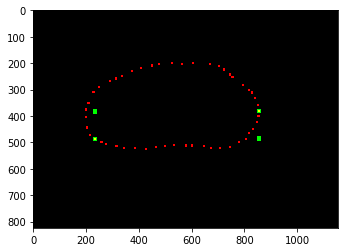

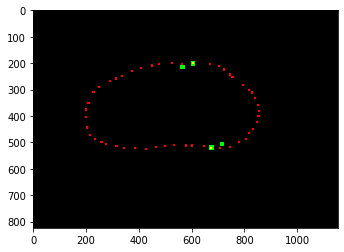

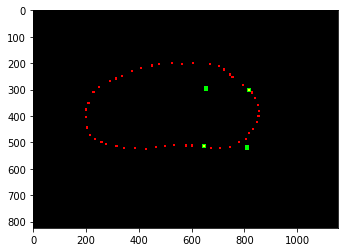

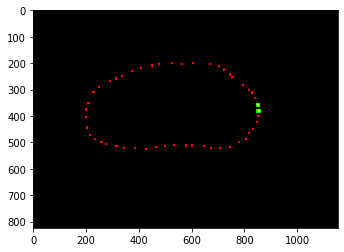

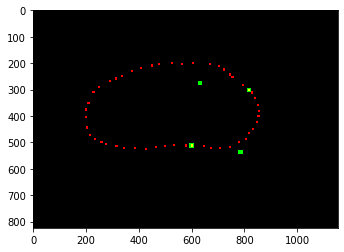

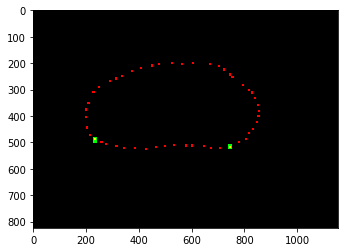

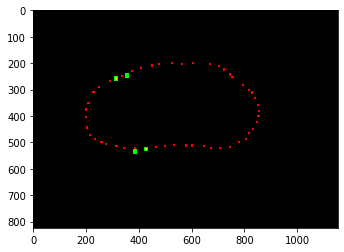

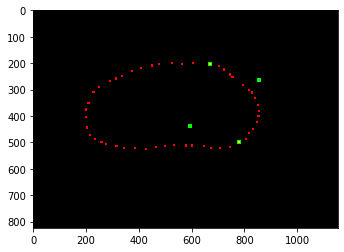

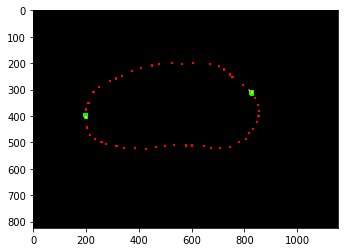

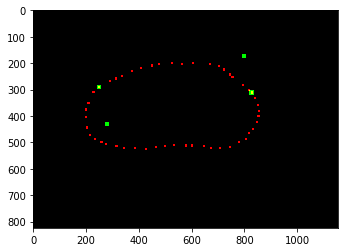

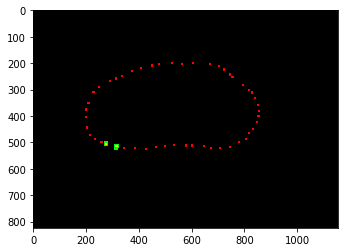

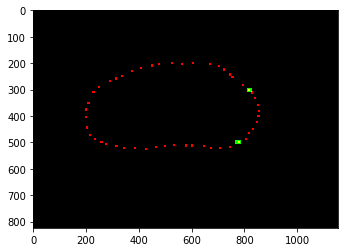

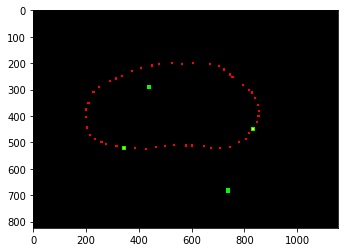

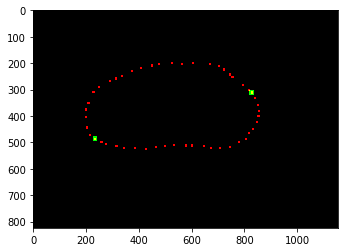

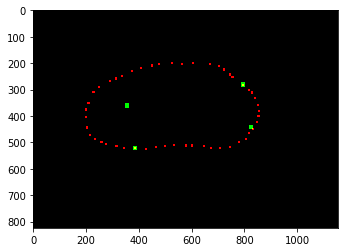

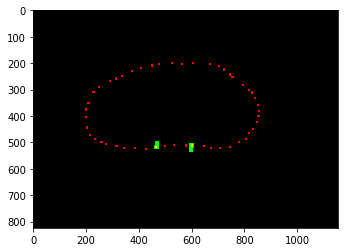

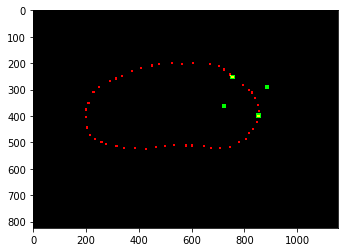

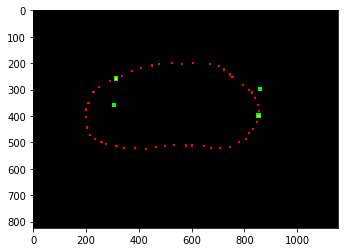

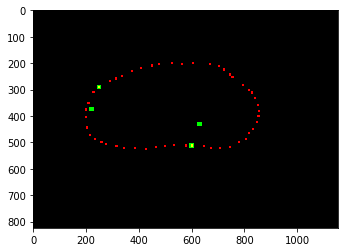

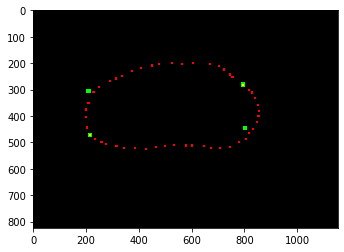

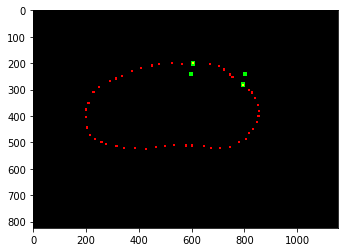

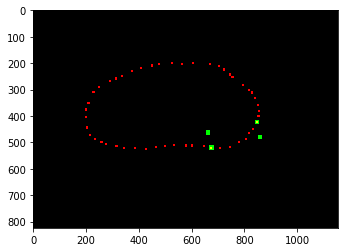

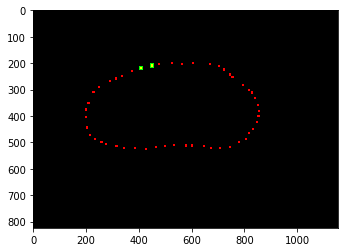

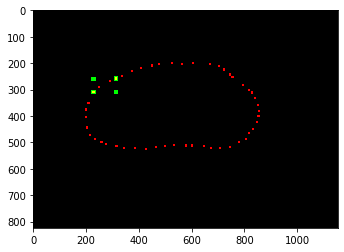

KeyboardInterrupt: 

In [5]:
while(True):
#Algorithm
    #Step1: randomly sample 2 points without replacement
    # to be the opposite points of the rectangle
    # and convert to numpy array for parallel computing
    pt1, pt2 = np.array(random.sample(points, 2))
    #Step2: calculate the other two points with a random angle
    a = (np.random.rand()-0.5)*np.pi/4
    w, h = pt2 - pt1
    delta_r = w*np.cos(a) + h*np.sin(a)
    delta_h = delta_r*np.sin(a)
    delta_w = delta_r*np.cos(a)
    pt3 = [pt1[0]+delta_w, pt1[1]+delta_h]
    pt4 = [pt2[0]-delta_w, pt2[1]-delta_h]

    # creating an rgb image to distinguish points
    img_rgb = np.zeros((img.shape[0], img.shape[1], 3))
    img_rgb[:, :, 0] = img

    # visualizing
    for pt in [pt1, pt2, pt3, pt4]:
        [y, x] = ((pt - pt0 + margin)*scale).astype(np.int)
        img_rgb[x-4*scale:x+4*scale, y-4*scale:y+4*scale, 1] = 1
        plt.imshow(img_rgb)
    plt.show()